In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('/content/car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
df = pd.DataFrame(data)
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
Year_df = df[['Year']]  # Feature (independent variable)
Price_df = df['Price']   # Target (dependent variable)

In [8]:
Year_df_train, Year_df_test, Price_df_train, Price_df_test = train_test_split(Year_df, Price_df, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(Year_df_train, Price_df_train)

LinearRegression()

In [10]:
year_2022 = np.array([[2022]])
predicted_price = model.predict(year_2022)[0]
predicted_price

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


743601.6159450412

In [11]:
Price_df_pred = model.predict(Year_df_test)
print(Price_df_pred)

[600775.91252081 505558.77690466 553167.34471273 553167.34471273
 553167.34471273 410341.6412885  505558.77690466 553167.34471273
 600775.91252081 600775.91252081 315124.50567235 505558.77690466
 410341.6412885  648384.48032889 553167.34471273 600775.91252081
 315124.50567235 410341.6412885  505558.77690466 505558.77690466
 505558.77690466 505558.77690466 505558.77690466]


In [12]:
r2 = r2_score(Price_df_test, Price_df_pred)
print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.3676


In [13]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Best fit line: Price = {slope:.2f} * Year + {intercept:.2f}")

Best fit line: Price = 47608.57 * Year + -95520922.49


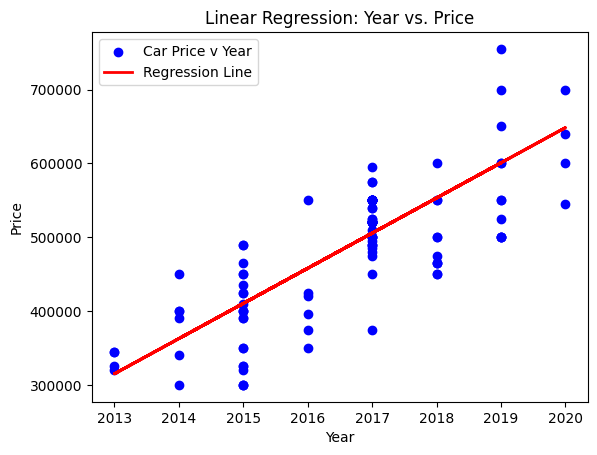

In [14]:
# Plot the regression line
plt.scatter(Year_df, Price_df, color='blue', label="Car Price v Year")
plt.plot(Year_df, model.predict(Year_df), color='red', linewidth=2, label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.title("Linear Regression: Year vs. Price")
plt.show()

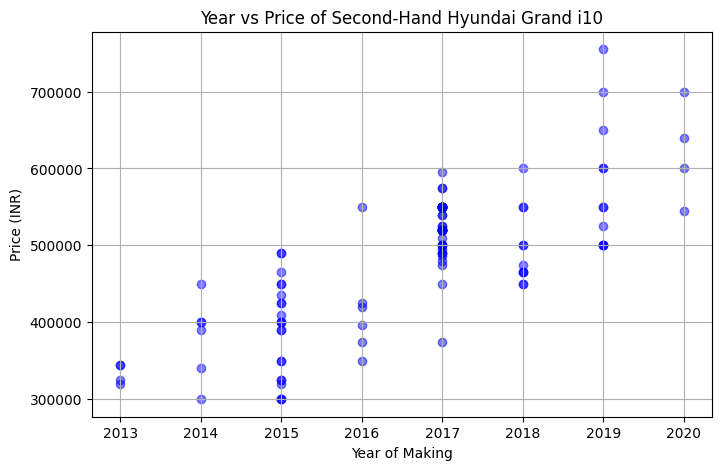

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Year"], df["Price"], color="blue", alpha=0.5)
plt.xlabel("Year of Making")
plt.ylabel("Price (INR)")
plt.title("Year vs Price of Second-Hand Hyundai Grand i10")
plt.grid(True)
plt.show()

In [16]:
# Define the independent (X) and dependent (y) variables
X = df["Year"].values.reshape(-1, 1)  # Reshaping for sklearn
y = df["Price"].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the price for a 2022 model
year_2022 = np.array([[2022]])
predicted_price = model.predict(year_2022)[0]

# Display the result
predicted_price


715488.0785097629

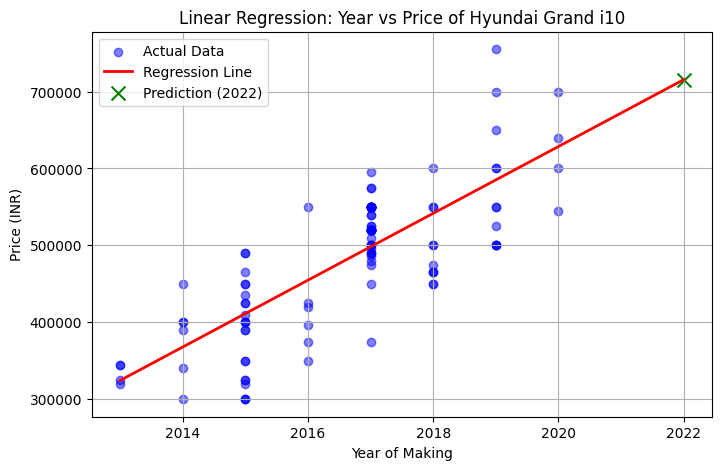

In [19]:
# Generate predictions for the regression line
years_range = np.arange(df["Year"].min(), 2023).reshape(-1, 1)  # Extending to 2022
predicted_prices = model.predict(years_range)

# Plot the data points and the regression line
plt.figure(figsize=(8, 5))
plt.scatter(df["Year"], df["Price"], color="blue", alpha=0.5, label="Actual Data")
plt.plot(years_range, predicted_prices, color="red", linewidth=2, label="Regression Line")
plt.scatter(2022, predicted_price, color="green", marker="x", s=100, label="Prediction (2022)")

# Labels and title
plt.xlabel("Year of Making")
plt.ylabel("Price (INR)")
plt.title("Linear Regression: Year vs Price of Hyundai Grand i10")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Train a Lasso regression model
lasso_model = Lasso(alpha=1000)  # Regularization strength (tunable parameter)
lasso_model.fit(X, y)

# Predictions using both models
y_pred_linear = model.predict(X)
y_pred_lasso = lasso_model.predict(X)

# Evaluate both models using Mean Squared Error (MSE) and R-squared (R²) score
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)

mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)

# Compare results
mse_linear, r2_linear, mse_lasso, r2_lasso


(3276721166.5638003,
 0.6026450104600283,
 3277101115.0719857,
 0.6025989356102557)